In [9]:
import PyPDF2 
import textract
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import requests
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from nltk.tokenize import RegexpTokenizer

In [29]:
#chinese cooking book
filename = '0393051773.pdf' 
#open allows you to read the file
pdfFileObj = open(filename,'rb')
#The pdfReader variable is a readable object that will be parsed
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
#discerning the number of pages will allow us to parse through all #the pages
num_pages = pdfReader.numPages
count = 0
text = ""
#The while loop will read each page
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
if text != "":
   text = text
else:
   text = textract.process(fileurl, method='tesseract', language='eng')


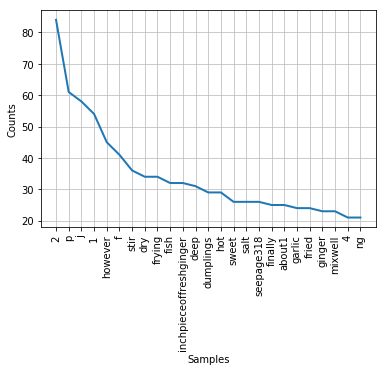

In [11]:
# Create tokenizer
tokenizer = RegexpTokenizer('\w+')
    # Create tokens
tokens = tokenizer.tokenize(text)
    # Initialize new list
words = []
# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())
# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
# Initialize new list
words_ns = []
# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)
            
# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

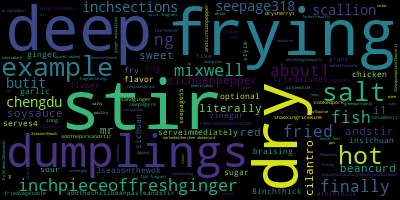

In [13]:
# Join the different processed titles together.
long_string = " ".join(words_ns)
# Create a WordCloud object
wordcloud = WordCloud()
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


In [33]:
def turn_pdf_to_text(filename):

    #open allows you to read the file
    pdfFileObj = open(filename,'rb')
    #The pdfReader variable is a readable object that will be parsed
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    #discerning the number of pages will allow us to parse through all #the pages
    num_pages = pdfReader.numPages
    count = 0
    text = ""
    #The while loop will read each page
    while count < num_pages:
        pageObj = pdfReader.getPage(count)
        count +=1
        text += pageObj.extractText()
    if text != "":
       text = text
    else:
       text = textract.process(filename, method='tesseract', language='eng')
    
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    
    
    # Join the different processed titles together.
    long_string = " ".join(words_ns)
    # Create a WordCloud object
    wordcloud = WordCloud()
    # Generate a word cloud
    wordcloud.generate(long_string)
    # Visualize the word cloud
    return wordcloud.to_image()


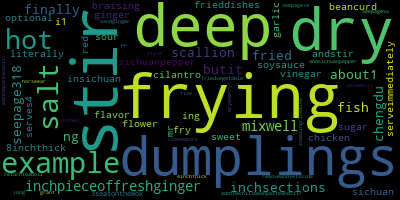

In [26]:
turn_pdf_to_text('0393051773.pdf')